In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
"""
Read in train and test as Pandas DataFrames
"""
# df_train = pd.read_csv("train.csv")
# df_test = pd.read_csv("test.csv")

dftrain1 = pd.read_csv("train.csv")
dftest1 = pd.read_csv("test.csv")
dftrain1 = dftrain1.drop(['smiles'], axis=1)

In [5]:
dftrain1.head()

,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,feat_009,feat_010,...,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256,gap
0,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1.19
1,1,0,0,0,1,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1.60
2,1,0,0,0,1,1,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1.49
3,1,0,0,0,1,1,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1.36
4,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1.98


In [4]:
dftest1.head()

,Id,smiles,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,...,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256
0,1,c1sc(-c2cnc3c(c2)c2nsnc2c2cc4cccnc4cc32)c2cc[n...,0,0,0,0,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0
1,2,[nH]1cccc1-c1cc2c3nsnc3c3c4sccc4[nH]c3c2s1,0,0,0,0,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0
2,3,[nH]1c2cc(-c3ccc[se]3)c3nsnc3c2c2c3cscc3c3ccc4...,1,0,0,0,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0
3,4,[nH]1c(cc2cnc3c(c12)c1=C[SiH2]C=c1c1ccc2=CCC=c...,1,0,0,0,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0
4,5,c1sc(-c2sc(-c3sc(-c4scc5[se]ccc45)c4ccoc34)c3c...,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [6]:
len(dftrain1)

1000000

In [8]:
# simple model
xvarssimple=list(dftrain1.columns)[1:len(list(dftrain1.columns))-1]
formulasimple = str("gap ~ ") + xvarssimple[0]
count = 0
for xvar in xvarssimple:
    if count > 0:
        formulasimple = formulasimple + "+" + xvar
    count = count + 1

print formulasimple

gap ~ feat_002+feat_003+feat_004+feat_005+feat_006+feat_007+feat_008+feat_009+feat_010+feat_011+feat_012+feat_013+feat_014+feat_015+feat_016+feat_017+feat_018+feat_019+feat_020+feat_021+feat_022+feat_023+feat_024+feat_025+feat_026+feat_027+feat_028+feat_029+feat_030+feat_031+feat_032+feat_033+feat_034+feat_035+feat_036+feat_037+feat_038+feat_039+feat_040+feat_041+feat_042+feat_043+feat_044+feat_045+feat_046+feat_047+feat_048+feat_049+feat_050+feat_051+feat_052+feat_053+feat_054+feat_055+feat_056+feat_057+feat_058+feat_059+feat_060+feat_061+feat_062+feat_063+feat_064+feat_065+feat_066+feat_067+feat_068+feat_069+feat_070+feat_071+feat_072+feat_073+feat_074+feat_075+feat_076+feat_077+feat_078+feat_079+feat_080+feat_081+feat_082+feat_083+feat_084+feat_085+feat_086+feat_087+feat_088+feat_089+feat_090+feat_091+feat_092+feat_093+feat_094+feat_095+feat_096+feat_097+feat_098+feat_099+feat_100+feat_101+feat_102+feat_103+feat_104+feat_105+feat_106+feat_107+feat_108+feat_109+feat_110+feat_111+feat

In [9]:
# remainingidsweek["0"]
dftrain1['id']=list(dftrain1.index)

In [10]:
dftrain1.head()

,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,feat_009,feat_010,...,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256,gap,id
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1.19,0
1,1,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1.60,1
2,1,0,0,0,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1.49,2
3,1,0,0,0,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1.36,3
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1.98,4


In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import glm, ols
from sklearn.linear_model import LinearRegression
import patsy
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

In [12]:
def cv_optimize_ridge(X, y, n_folds=8):
    clf = Ridge()
    parameters = {"alpha": [1e-8, 1e-6, 1e-5, 1e-4, 5e-4, 1e-3, 1e-2, 1e-1, 1.0, 10, 50, 100, 500, 1000]}
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring="mean_squared_error")
    gs.fit(X, y)
    return gs

In [13]:
def cv_optimize_lasso(X, y, n_folds=8):
    clf = Lasso()
    parameters = {"alpha": [1e-8, 1e-6, 1e-5, 1e-4, 5e-4, 1e-3, 1e-2, 1e-1, 1.0, 10, 50, 100, 500, 1000]}
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring="mean_squared_error")
    gs.fit(X, y)
    return gs

In [14]:
def cv_optimize_enet(X, y, n_folds=8):
    clf=ElasticNet()
    parameters = {"alpha": [1e-8, 1e-6, 1e-5, 1e-4, 5e-4, 1e-3, 1e-2, 1e-1, 1.0, 10, 50, 100, 500, 1000]}
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring="mean_squared_error")
    gs.fit(X, y)
    return gs

In [16]:
# dftrain['id']=list(dftrain.index)

In [15]:
dftrain1.head()

,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,feat_009,feat_010,...,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256,gap,id
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1.19,0
1,1,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1.60,1
2,1,0,0,0,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1.49,2
3,1,0,0,0,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1.36,3
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1.98,4


In [68]:
# remainingidsweek.head()
# 800000
lenTrain=5000

In [69]:
dftrain=dftrain1[:lenTrain]
regdftrain=dftrain1[:lenTrain]

In [70]:

######## Rerunning will overwrite reproducible results

# # sample by game ID number to avoid any indexing issues
# # store samples (like choosing a seed)



uniqueids = dftrain.id
traininglength = lenTrain*0.8
testinglength = lenTrain*0.1
validatelength = lenTrain*0.1

testids = np.random.choice(a = uniqueids, size = testinglength, replace = False)
remainingids = list([x for x in uniqueids if x not in testids])

trainidsdftrain = pd.DataFrame()
testidsdf = pd.DataFrame()
remainingidsdf = pd.DataFrame()
for i in range(5):
    trainidsdftrain[i] = np.random.choice(a = remainingids, size = traininglength, replace = False)
testidsdf[0] = testids
remainingidsdf[0] = remainingids

trainidsdftrain.to_csv("trainidsdftrain.csv")
testidsdf.to_csv("testidsdf.csv")
remainingidsdf.to_csv("remainingidsdf.csv")



In [71]:
# trainidsdfweek.head()

In [72]:
%%time

trainidsdftrain = pd.DataFrame.from_csv("trainidsdftrain.csv")
remainingids = pd.DataFrame.from_csv("remainingidsdf.csv")
remainingids = list(remainingids["0"])
uniqueids = np.unique(regdftrain.id)

CPU times: user 64.9 ms, sys: 5.03 ms, total: 69.9 ms
Wall time: 67.3 ms


In [73]:
# traindf.head()

In [74]:
def squarelist(list):
    return [ x**2 for x in list ]

def abslist(list):
    return [ abs(x) for x in list ]

def rootlist(list):
    return [ np.sqrt(x) for x in list ]

# sources: http://stackoverflow.com/questions/12555443/squaring-all-elements-in-a-list

***We ran the three sets of predictors on the following four models, to produce a total of 12 fit models.***

- **OLS Regression: this is the simplest, go-to model, and we expect it to perform worse than the others, which might filter out unnecessary data well.**


- **Ridge Regression: we used this because it ought to set the coefficients of less valuable predictors to near-zero values, which could produce excellent predictions given a large number of predictors.**


- **Lasso Regression: we used this because it ought to set the coefficients of less valuable predictors to zero values, which could produce excellent predictions given a large number of predictors.**


- **Elastic Net: we used this for similar reasons to the above.**

***Again, we trained and validated each of these on the following three predictor sets:***

- **Simple set**

- **Intuitive set**

- **All set**

***The model statements for these three predictors sets are printed above.***

In [75]:
%%time



# Stats for the Simple Model
olsmsessimple = []
olsmadssimple = []
ridgemsessimple = []
ridgemadssimple = []
lassomsessimple = []
lassomadssimple = []
enetmsessimple = []
enetmadssimple = []

# Stats for the Intuitive Model
olsmsesintuitive = []
olsmadsintuitive = []
ridgemsesintuitive = []
ridgemadsintuitive = []
lassomsesintuitive = []
lassomadsintuitive = []
enetmsesintuitive = []
enetmadsintuitive = []

# Stats for the Full Model
olsmsesall = []
olsmadsall = []
ridgemsesall = []
ridgemadsall = []
lassomsesall = []
lassomadsall = []
enetmsesall = []
enetmadsall = []

coeffsLinear=[]
coeffsRidge=[]
coeffsLasso=[]
coeffsEnet=[]


# Cross-Validate
for i in trainidsdftrain.columns.values:
    trainids = trainidsdftrain[i]
    validationids = set(remainingids) - set(trainids)
    
    traindf = regdftrain.loc[regdftrain["id"].isin(trainids)]
    validatedf = regdftrain.loc[regdftrain["id"].isin(validationids)]
    
    # make simple model x and y dataframes
    forfitsimple = pd.DataFrame(traindf.gap)
    forpredsimple = pd.DataFrame(validatedf.gap)
    for xvar in xvarssimple:
        forpredsimple[xvar] = validatedf[xvar]
        forfitsimple[xvar] = traindf[xvar]
    ytrainsimple,xtrainsimple = patsy.dmatrices(formulasimple, data=forfitsimple)
    yvalidatesimple,xvalidatesimple = patsy.dmatrices(formulasimple, data=forpredsimple)

    
#     # make intuitive model x and y dataframes
#     forfitintuitive = pd.DataFrame(traindf.gap)
#     forpredintuitive = pd.DataFrame(validatedf.gap)
#     for xvar in xvarsintuitive:
#         forpredintuitive[xvar] = validatedf[xvar]
#         forfitintuitive[xvar] = traindf[xvar]
#     ytrainintuitive,xtrainintuitive = patsy.dmatrices(formulaintuitive, data=forfitintuitive)
#     yvalidateintuitive,xvalidateintuitive = patsy.dmatrices(formulaintuitive, data=forpredintuitive)
    
    
    
#     # make full model x and y dataframes    
#     forfitall = pd.DataFrame(traindf.gap)
#     forpredall = pd.DataFrame(validatedf.gap)
#     for xvar in xvarsall:
#         forpredall[xvar] = validatedf[xvar]
#         forfitall[xvar] = traindf[xvar]
#     ytrainall,xtrainall = patsy.dmatrices(formulaall, data=forfitall)
#     yvalidateall,xvalidateall = patsy.dmatrices(formulaall, data=forpredall)
    
    
    
    
# Simple Models    

    # linear
    fit = ols(formulasimple, data = forfitsimple).fit()
    predsLinear = fit.predict(forpredsimple)
    prederrors = []
    count = 0
    for act in yvalidatesimple:
        prederrors.append(float(predsLinear[count] - float(act)))
        count = count + 1
    
    olsmsessimple.append(np.mean(squarelist(prederrors)))
    olsmadssimple.append(np.mean(abslist(prederrors))) 
    coeffsLinear.append(fit)
    
    # ridge
    fitridge = cv_optimize_ridge(xtrainsimple, ytrainsimple, n_folds=8)
    alpharidge = fitridge.best_params_['alpha']
    clfridge = Ridge(alpha=alpharidge).fit(xtrainsimple,ytrainsimple)
    predsRidge = clfridge.predict(xvalidatesimple)
    prederrors = []
    count = 0
    for act in yvalidatesimple:
        prederrors.append(float(predsRidge[count] - float(act)))
        count = count + 1
    ridgemsessimple.append(np.mean(squarelist(prederrors)))
    ridgemadssimple.append(np.mean(abslist(prederrors))) 
    coeffsRidge.append(clfridge)
    
    # lasso
    fitlasso = cv_optimize_lasso(xtrainsimple, ytrainsimple, n_folds=8)
    alphalasso = fitlasso.best_params_['alpha']
    clflasso = Lasso(alpha=alphalasso).fit(xtrainsimple,ytrainsimple)
    predsLasso = clflasso.predict(xvalidatesimple)
    prederrors = []
    count = 0
    for act in yvalidatesimple:
        prederrors.append(float(predsLasso[count] - float(act)))
        count = count + 1
    lassomsessimple.append(np.mean(squarelist(prederrors)))
    lassomadssimple.append(np.mean(abslist(prederrors)))  
    coeffsLasso.append(clflasso)
    
    # enet
    fitenet = cv_optimize_enet(xtrainsimple, forfitsimple["gap"], n_folds=8)
    alphaenet = fitenet.best_params_['alpha']
    clfenet = ElasticNet(alpha=alphaenet).fit(xtrainsimple,forfitsimple["gap"])
    predsEnet = clfenet.predict(xvalidatesimple)
    prederrors = []
    count = 0
    for act in yvalidatesimple:
        prederrors.append(float(predsEnet[count] - float(act)))
        count = count + 1
    enetmsessimple.append(np.mean(squarelist(prederrors)))
    enetmadssimple.append(np.mean(abslist(prederrors)))       
    coeffsEnet.append(clfenet)
    
    
# # Models with Seemingly Reasonable Interactions by Intuition

#     # linear
#     fit = ols(formulaintuitive, data = forfitintuitive).fit()
#     preds = fit.predict(forpredintuitive)    
#     prederrors = []
#     count = 0
#     for act in yvalidateintuitive:
#         prederrors.append(float(preds[count] - float(act)))
#         count = count + 1
#     olsmsesintuitive.append(np.mean(squarelist(prederrors)))
#     olsmadsintuitive.append(np.mean(abslist(prederrors))) 
        
    
#     # ridge
#     fitridge = cv_optimize_ridge(xtrainintuitive, ytrainintuitive, n_folds=8)
#     alpharidge = fitridge.best_params_['alpha']
#     clfridge = Ridge(alpha=alpharidge).fit(xtrainintuitive,ytrainintuitive)
#     preds = clfridge.predict(xvalidateintuitive)
#     prederrors = []
#     count = 0
#     for act in yvalidateintuitive:
#         prederrors.append(float(preds[count] - float(act)))
#         count = count + 1
#     ridgemsesintuitive.append(np.mean(squarelist(prederrors)))
#     ridgemadsintuitive.append(np.mean(abslist(prederrors))) 
    
    
#     # lasso
#     fitlasso = cv_optimize_lasso(xtrainintuitive, ytrainintuitive, n_folds=8)
#     alphalasso = fitlasso.best_params_['alpha']
#     clflasso = Lasso(alpha=alphalasso).fit(xtrainintuitive,ytrainintuitive)
#     preds = clflasso.predict(xvalidateintuitive)
#     prederrors = []
#     count = 0
#     for act in yvalidateintuitive:
#         prederrors.append(float(preds[count] - float(act)))
#         count = count + 1
#     lassomsesintuitive.append(np.mean(squarelist(prederrors)))
#     lassomadsintuitive.append(np.mean(abslist(prederrors))) 

#     # enet
#     fitenet = cv_optimize_enet(xtrainintuitive, forfitintuitive["gap"], n_folds=8)
#     alphaenet = fitenet.best_params_['alpha']
#     clfenet = ElasticNet(alpha=alphaenet).fit(xtrainintuitive,forfitintuitive["gap"])
#     preds = clfenet.predict(xvalidateintuitive)
#     prederrors = []
#     count = 0
#     for act in yvalidateintuitive:
#         prederrors.append(float(preds[count] - float(act)))
#         count = count + 1
#     enetmsesintuitive.append(np.mean(squarelist(prederrors)))
#     enetmadsintuitive.append(np.mean(abslist(prederrors)))
    
    
# # Models with Nearly All Interaction Terms
#     # linear
#     fit = ols(formulaall, data = forfitall).fit()
#     preds = fit.predict(forpredall)    
#     prederrors = []
#     count = 0
#     for act in yvalidateall:
#         prederrors.append(float(preds[count] - float(act)))
#         count = count + 1
#     olsmsesall.append(np.mean(squarelist(prederrors)))
#     olsmadsall.append(np.mean(abslist(prederrors))) 
        
    
#     # ridge
#     fitridge = cv_optimize_ridge(xtrainall, ytrainall, n_folds=8)
#     alpharidge = fitridge.best_params_['alpha']
#     clfridge = Ridge(alpha=alpharidge).fit(xtrainall,ytrainall)
#     preds = clfridge.predict(xvalidateall)
#     prederrors = []
#     count = 0
#     for act in yvalidateall:
#         prederrors.append(float(preds[count] - float(act)))
#         count = count + 1
#     ridgemsesall.append(np.mean(squarelist(prederrors)))
#     ridgemadsall.append(np.mean(abslist(prederrors))) 
    
    
#     # lasso
#     fitlasso = cv_optimize_lasso(xtrainall, ytrainall, n_folds=8)
#     alphalasso = fitlasso.best_params_['alpha']
#     clflasso = Lasso(alpha=alphalasso).fit(xtrainall,ytrainall)
#     preds = clflasso.predict(xvalidateall)
#     prederrors = []
#     count = 0
#     for act in yvalidateall:
#         prederrors.append(float(preds[count] - float(act)))
#         count = count + 1
#     lassomsesall.append(np.mean(squarelist(prederrors)))
#     lassomadsall.append(np.mean(abslist(prederrors))) 

#     # enet
#     fitenet = cv_optimize_enet(xtrainall, forfitall["gap"], n_folds=8)
#     alphaenet = fitenet.best_params_['alpha']
#     clfenet = ElasticNet(alpha=alphaenet).fit(xtrainall,forfitall["gap"])
#     preds = clfenet.predict(xvalidateall)
#     prederrors = []
#     count = 0
#     for act in yvalidateall:
#         prederrors.append(float(preds[count] - float(act)))
#         count = count + 1
#     enetmsesall.append(np.mean(squarelist(prederrors)))
#     enetmadsall.append(np.mean(abslist(prederrors)))
    
    

CPU times: user 3min, sys: 12.3 s, total: 3min 13s
Wall time: 3min 5s


In [76]:
forpredsimpleAll = pd.DataFrame(dftrain.gap)
for xvar in xvarssimple:
    forpredsimpleAll[xvar] = dftrain[xvar]
ytestsimple,xtestsimple = patsy.dmatrices(formulasimple, data=forpredsimpleAll)


# Linear
minIndex=olsmsessimple.index(min(olsmsessimple))
fit=coeffsLinear[minIndex]
predsLinearAll = fit.predict(forpredsimpleAll)

# fit = ols(formulasimple, data = forfitsimple).fit()
#     predsLinear = fit.predict(forpredsimple)
#     prederrors = []
#     count = 0

# Ridge
minIndex=ridgemsessimple.index(min(ridgemsessimple))
clfRidge=coeffsRidge[minIndex]
predsRidgeAll = clfRidge.predict(xtestsimple)

# Lasso
minIndex=lassomsessimple.index(min(lassomsessimple))
clflasso=coeffsLasso[minIndex]
predsLassoAll = clflasso.predict(xtestsimple)

# Enet
minIndex=enetmsessimple.index(min(enetmsessimple))
clfEnet=coeffsEnet[minIndex]
predsEnetAll = clfEnet.predict(xtestsimple)


# prederrors = []
# count = 0
# for act in yvalidatesimple:
#     prederrors.append(float(predsLasso[count] - float(act)))
#     count = count + 1
# lassomsessimple.append(np.mean(squarelist(prederrors)))
# lassomadssimple.append(np.mean(abslist(prederrors)))  
# coeffsLasso.append(clflasso)

# forfitsimple = pd.DataFrame(traindf.gap)
#     forpredsimple = pd.DataFrame(validatedf.gap)
#     for xvar in xvarssimple:
#         forpredsimple[xvar] = validatedf[xvar]
#         forfitsimple[xvar] = traindf[xvar]
#     ytrainsimple,xtrainsimple = patsy.dmatrices(formulasimple, data=forfitsimple)
#     yvalidatesimple,xvalidatesimple = patsy.dmatrices(formulasimple, data=forpredsimple)

In [77]:
import copy
newdftrain = copy.deepcopy(dftrain)
newdftrain['predictedLinear']=predsLinearAll
newdftrain['predictedLasso']=predsLassoAll
newdftrain['predictedRidge']=predsRidgeAll
newdftrain['predictedEnet']=predsEnetAll

In [78]:
newdftrain['errLinear']=(newdftrain['predictedLinear']-newdftrain['gap'])**2
newdftrain['errLasso']=(newdftrain['predictedLasso']-newdftrain['gap'])**2
newdftrain['errRidge']=(newdftrain['predictedRidge']-newdftrain['gap'])**2
newdftrain['errEnet']=(newdftrain['predictedEnet']-newdftrain['gap'])**2

In [99]:
print newdftrain['errLinear'].mean()
print newdftrain['errLasso'].mean()
print newdftrain['errRidge'].mean()
print newdftrain['errEnet'].mean()

0.0889379096386
0.0887306640057
0.0887323641159
0.0887341346017


In [90]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from bs4 import BeautifulSoup
import requests

In [91]:
# Simple = [round(np.mean(olsmadssimpleweek),2), round(np.mean(ridgemadssimpleweek),2), 
# round(np.mean(lassomadssimpleweek),2), round(np.mean(enetmadssimpleweek),2)]
# Intuitive = [round(np.mean(olsmadsintuitiveweek),2), round(np.mean(ridgemadsintuitiveweek),2), 
# round(np.mean(lassomadsintuitiveweek),2), round(np.mean(enetmadsintuitiveweek),2)]
All = [round(np.mean(olsmsessimple),5), round(np.mean(ridgemsessimple),5), round(np.mean(lassomsessimple),5), round(np.mean(enetmsessimple),5)]

MSEResultstableweek = pd.DataFrame()
# MSEResultstableweek["Simple"] = Simple
# MSEResultstableweek["Intuitive"] = Intuitive
MSEResultstableweek["All"] = All
MSEResultstableweek.index = ["OLS","Ridge","Lasso", "ElasticNet"]
print "Cross Validation Root Avg. MSE Next Week's Price:"
MSEResultstableweek

Cross Validation Root Avg. MSE Next Week's Price:


,All
OLS,0.08851
Ridge,0.08823
Lasso,0.08820
ElasticNet,0.08821


RMSE Results for Different Models of Next Week's Price:


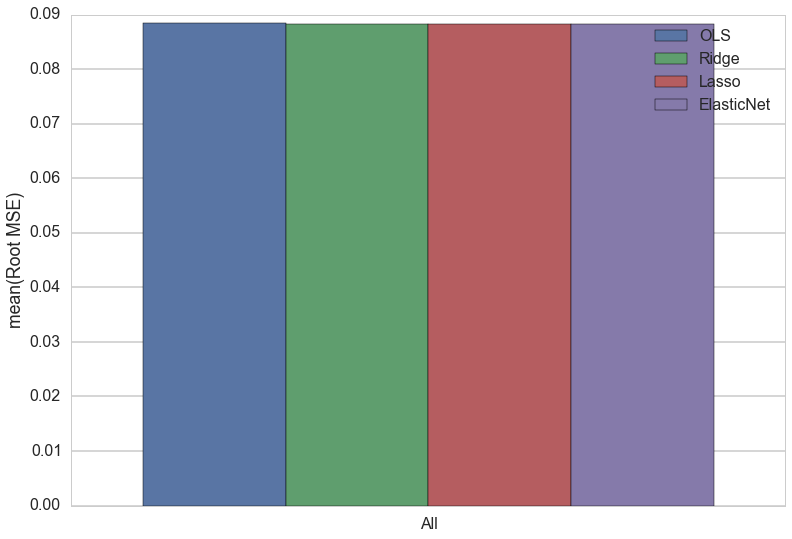

In [92]:
MSE = All
forplottableweek = pd.DataFrame()
forplottableweek["Root MSE"] = MSE
indices = [list(MSEResultstableweek.index)]
forplottableweek.index = indices
digits =  ["All","All","All", "All"]
forplottableweek["Digits"] = digits
print "RMSE Results for Different Models of Next Week's Price:"
sns.barplot(y = "Root MSE",x = digits, hue = forplottableweek.index.values, data = forplottableweek)

In [82]:
dftrain.to_csv("train1.csv")